In [ ]:
pip install osmnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 2.2 MB/s eta 0:00:00


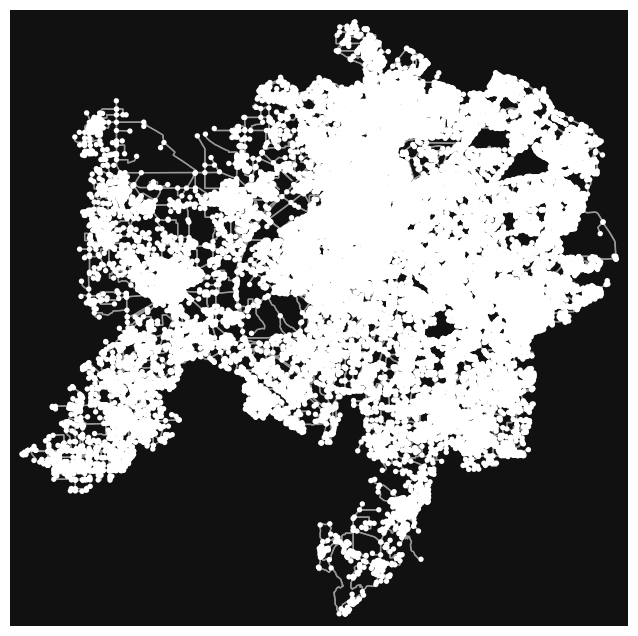

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Set the city name or coordinates for Gurgaon
place_name = "Gurgaon, India"

# Download the street network
graph = ox.graph_from_place(place_name, network_type="all")

# Plot the street network
ox.plot_graph(ox.project_graph(graph))
plt.show()

# Save the graph to a GeoJSON file
ox.save_graph_geopackage(graph, filepath="gurgaon_graph.gpkg")


<ipython-input-4-6e2dffd36255>:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile)


                                            geometry  bbox_north  bbox_south  \
0  POLYGON ((76.86563 28.38047, 76.87000 28.37730...   28.540905   28.315392   

   bbox_east  bbox_west   place_id  osm_type    osm_id        lat      lon  \
0  77.126541  76.865634  242650161  relation  10398244  28.428262  77.0027   

      class            type  place_rank  importance    addresstype     name  \
0  boundary  administrative          12     0.45001  city_district  Gurgaon   

                                 display_name  
0  Gurgaon, Gurugram District, Haryana, India  


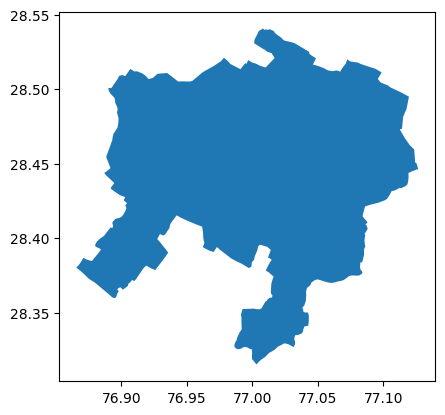

In [ ]:
import osmnx as ox
import geopandas as gpd

# Set the city name or coordinates for Gurgaon
place_name = "Gurgaon, India"

# Download the administrative boundaries as a GeoDataFrame
gdf = ox.geocode_to_gdf(place_name)

# Save the GeoDataFrame to a shapefile
output_shapefile = "gurgaon_boundary.shp"
gdf.to_file(output_shapefile)

# Print the GeoDataFrame information
print(gdf.head())

# Plot the boundaries (optional)
gdf.plot()
plt.show()



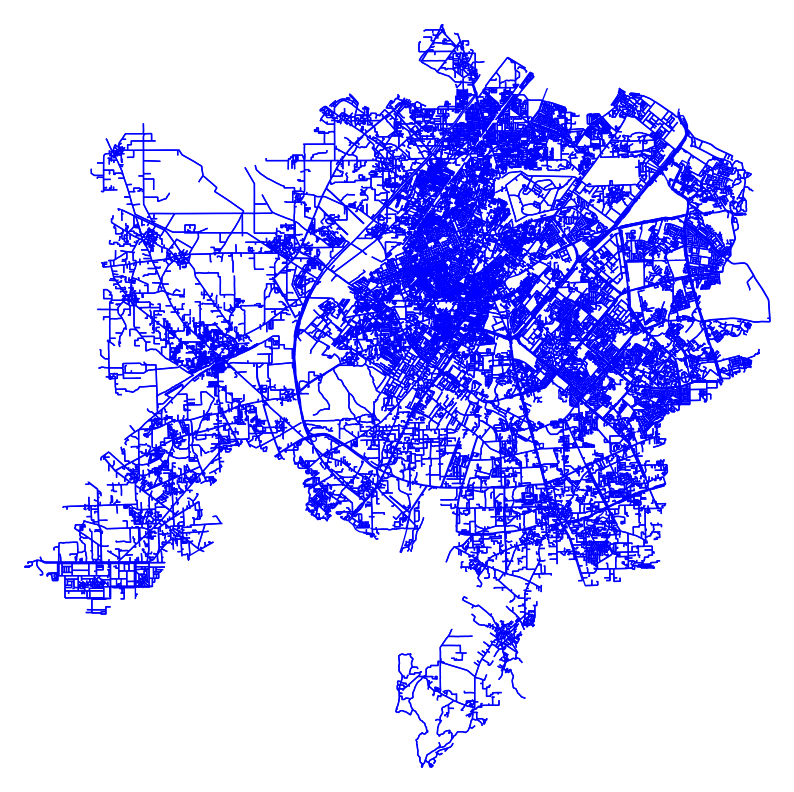

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Set the city name or coordinates for Gurgaon
place_name = "Gurgaon, India"

# Download the administrative boundaries as a GeoDataFrame
gdf = ox.geocode_to_gdf(place_name)

# Download the OpenStreetMap graph for the specified area
graph = ox.graph_from_place(place_name, network_type="all")

# Plot the administrative boundary of Gurgaon
ax = gdf.boundary.plot(figsize=(10, 20), edgecolor='black')

# Plot the OpenStreetMap network on top of the administrative boundary
ox.plot_graph(ox.project_graph(graph), ax=ax, edge_color='blue', node_size=0)

# Show the plot
plt.show()


In [ ]:
import requests
import json
from datetime import datetime

# Replace 'YOUR_MAPQUEST_API_KEY' with your actual MapQuest API key
api_key = 'YOUR_MAPQUEST_API_KEY'

# Set the coordinates or city name for Gurgaon
location = 'Gurgaon, India'

# Set the start and end times for the analysis (replace with actual times)
start_time = '07:00:00'  # 7:00 AM
end_time = '09:00:00'    # 9:00 AM

# Convert start and end times to timestamps
start_timestamp = datetime.strptime(start_time, '%H:%M:%S').timestamp()
end_timestamp = datetime.strptime(end_time, '%H:%M:%S').timestamp()

# Make a request to the MapQuest Traffic API
url = f'http://www.mapquestapi.com/traffic/v2/incidents?key={api_key}&location={location}&outFormat=json'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        # Attempt to parse the JSON response
        data = response.json()

        # Extract and filter traffic incidents within the specified time range
        peak_hour_incidents = [incident for incident in data['incidents'] if start_timestamp <= incident['startTime'] <= end_timestamp]

        # Calculate the average peak hour traffic based on incident data
        average_traffic = len(peak_hour_incidents) / (end_timestamp - start_timestamp)  # Adjust as needed

        print(f'Average peak hour traffic incidents: {average_traffic:.2f} incidents per second')

    except json.JSONDecodeError as e:
        print(f'Error decoding JSON: {e}')
else:
    print(f'Error in API request. Status code: {response.status_code}')
    print(response.text)  # Print the response content for debugging purposes



Error in API request. Status code: 401
The AppKey submitted with this request is invalid.
